In [1]:
#Import necessary packages
import pandas as pd
import boto3
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_columns', 200)
%matplotlib inline 

In [2]:
#Pull the ML Table 1 csv from S3 bucket 
#TODO: enter the credentails below to run the code 
S3_Key_id=''
S3_Secret_key=''

def pull_data(Key_id, Secret_key, file):
    """
    Function which CJ wrote to pull data from S3 
    """
    BUCKET_NAME = "gtown-wildfire-ds"
    OBJECT_KEY = file
    client = boto3.client(
        's3',
        aws_access_key_id= Key_id,
        aws_secret_access_key= Secret_key)
    obj = client.get_object(Bucket= BUCKET_NAME, Key= OBJECT_KEY) 
    file_df = pd.read_csv(obj['Body'])
    return (file_df)

#Pull in the Machine Learning Table 1 csv
file = 'MLTable1.csv'
df = pull_data(S3_Key_id, S3_Secret_key, file)
df.head()

,Unnamed: 0,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,1,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
#Drop the Unnamed: 0 column, as it is unnecessary
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
#Seperate data sets as labels and features
X = df.drop('FIRE_DETECTED', axis=1)
y = df['FIRE_DETECTED']

In [5]:
#Load the dataset and split into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state is a random seed

In [6]:
#Create a scalar to get optimized result
sc = StandardScaler() 
#Transform the feature data by using the fit_transform 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test) 

Yellowbrick's Precision-Recall Curves can help us better understand the precision of our testing. These curves will show the tradeoff between a classifier's precision (the ratio of true positives to the sum of true and false positives) and recall (the ratio of true positives to the sum of true positives and false negatives).

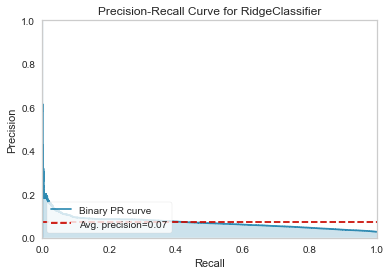

<AxesSubplot:title={'center':'Precision-Recall Curve for RidgeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [7]:
#Create a binary classification Precision-Recall Curve. 
#As we can see in the figure below, we have an average precision of 0.07. 
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

# Create the visualizer, fit, score, and show the figure 
viz = PrecisionRecallCurve(RidgeClassifier(random_state=0))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

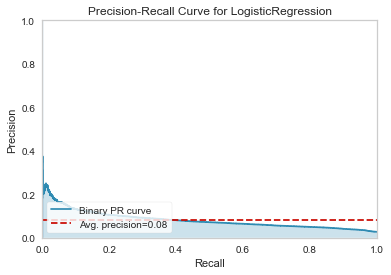

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [8]:
#Create a Precision-Recall Curve for LogisticRegression.
#As we can see in the figure below, we have an average precision of 0.08. 
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    LogisticRegression(random_state=0)
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

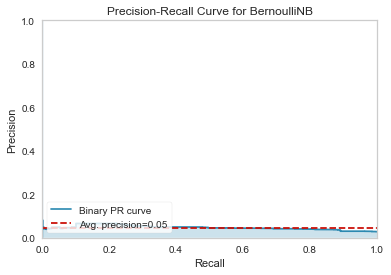

In [9]:
#Create a Precision-Recall Curve for BernoulliNB.
#As we can see in the figure below, we have an average precision of 0.05. 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import precision_recall_curve

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = precision_recall_curve(BernoulliNB(), X_train, y_train, X_test, y_test)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


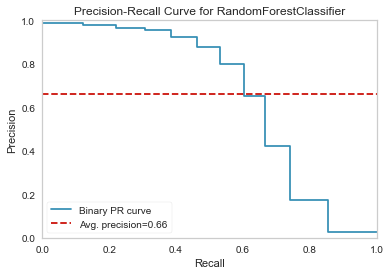

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [10]:
#Create a Precision-Recall Curve for RandomForestClassifier. 
#As we can see in the figure below, we have an average precision of 0.66. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Yellowbrick'ROC (Reciever Operating Characteristic)/AUC (Area Under the Curve)can help us better understand the tradeoff between a classifier's sensitivity and specificity. 
Below, we will create ROC Curves for Logistic Regression, and Logistic Regression (Quick Method) to better visualize the sensitivity and specificity of our testing. 

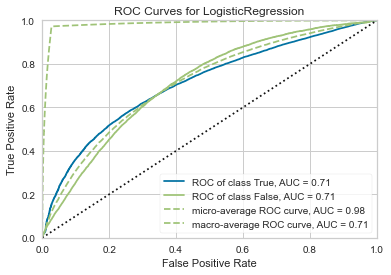

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [11]:
#Create ROC Curves for Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC


# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["True", "False"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


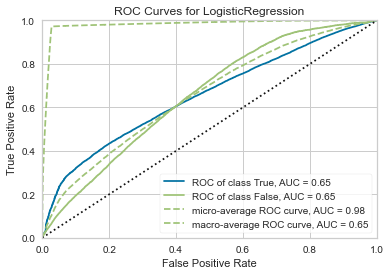

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['True', 'False'], estimator=LogisticRegression())

In [12]:
#Create ROC Curves for LogisticRegression (using Quick Method).
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.linear_model import LogisticRegression


# Instantiate the visualizer with the classification model
model = LogisticRegression()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['True', 'False'])